# Семинар 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (15, 6)

## Линейная регрессия: напоминание

В задаче линейной регрессии мы предполагаем, что ответ является линейной функцией от данных, то есть

$$y = w_1 x_1 + \ldots + w_m x_m = \langle x, w\rangle,$$

* Здесь $\langle\cdot, \cdot\rangle$ — скалярное произведение.
* $w_i$ — вес i-ого признака в модели линейной регрессии. 
    * $w=(w_1, \ldots, w_m)$ — вектор весов признаков.
* $x_i$ — значение i-ого признака во входном $x$ 

Распространенным способом обучения линейной регрессионной модели является метод наименьших квадратов. При использовании этого метода минимизируется *квадратичная функция потерь*:

$$Q(w) = \sum_{j=1}^n Q_j(w) = \sum_{j=1}^n ( \langle x^j, w\rangle - y^j)^2$$

Здесь $n$ — число элементов в обучающей выборке.

Явная формула для вектора весов, решающая минимизационную задачу:

$$w = (X^T X)^{-1} X^T y,$$

где $X$ — матрица объект-признак (по строкам объекты, по столбцам признаки), $y$ — вектор правильных ответов.

Эта формула очень полезна для теоретического анализа, но имеет некоторые ограничения:

1. В ней используется «дорогая» операция — обращение матрицы размером $d\times d$, где $d$ — количество признаков. Она занимает $O(d^3)$ операций, и если $d$ большое, может быть довольно медленной.
2. Эта формула выведена в предположении именно квадратичной функции потерь. Если мы захотим использовать другую формулу потерь, она не работает (и не всегда можно вывести такую явную формулу, которая бы работала). 

Вместо использования явной формулы можно предложить другой подход — минимизация $Q$ с помощью итеративных методов. Простейшим из них является метод градиентного спуска. 

# Градиентный спуск

Рассмотрим функцию $f(x, y)=x^2 + 10 y^2$. Её градиент равен $\nabla f(x, y)=\frac{\partial f(x, y)}{\partial(x, y)}=(2x, 20y)$. Он показывает направление наискорейшего роста функции, то есть отвечает на вопрос «куда нам идти, если мы находимся в точке $(x, y)$ и хотим увеличивать значение функции как можно быстрее». Чтобы уменьшать значение функции, нужно идти в противоположном направлении. В связи с этим, напрашивается такой алгоритм нахождения минимума функции $f$:

1. Возьмём любую точку $(x_0, y_0)$. Посчитаем градиент в этой точке.

2. Для каждого $i=1, \ldots$, положим: $(x_{i+1}, y_{i+1})=(x_i, y_i) - \eta \nabla f(x_i, y_i)$, где $\eta$ — какое-то число (небольшое).

3. Будем продолжать вычислять очередную точку $(x_i, y_i)$ до тех пор, пока мы не окажемся достаточно близко к минимуму — например, до тех пор, пока градиент не слишком маленький.

In [5]:
def f(u):
    return u[0] ** 2 + u[1] ** 2
def Df(u):
    return np.array([2*u[0], 2 * u[1]])

### Задания для самостоятельного решения

1. Допишите код для функции градиентного спуска.
2. Попробуйте поизменять основные параметры функции (`eta`, `initial_point`, `precision`). Что вы наблюдаете?

In [27]:
def gradient_descent(f, Df, eta=1, steps=20000, initial_point=(2, 2), precision=1e-10,
                            xmin=-4, xmax=4, ymin=-3, ymax=3):
    
    u_prev = np.array(initial_point)

    X = np.linspace(xmin, xmax, 100)
    Y = np.linspace(ymin, ymax, 100)
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, [[f(np.array([x, y])) for x in X] for y in Y], 100)
    # нарисуем линии уровня функции $f$

    points = []
    for i in range(steps):
        points.append(u_prev)
        grad = Df(u_prev)
        
        u_new = u_prev - eta * grad
        
        if np.linalg.norm(u_new - u_prev) <= precision:
            points.append(u_new)
            break
        u_prev = u_new

    plt.plot([p[0] for p in points], [p[1] for p in points], 'o-')
    
    return points[-1]

array([-2, -2])

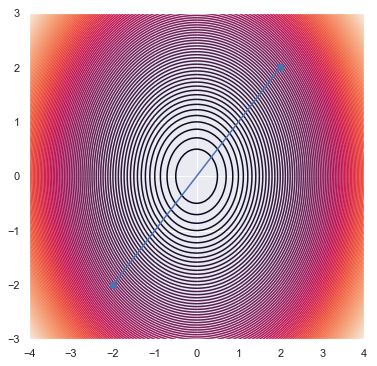

In [28]:
gradient_descent(f=f, Df=Df)

array([3.43462726e-09, 3.43462726e-09])

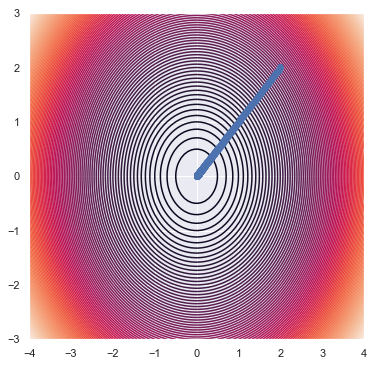

In [8]:
gradient_descent(f=f, Df=Df, eta = 0.01)

## Градиентный спуск и линейная регрессия

Пусть идеальная зависимость задается следующим образом: $y = kx + b$, где $k = 4$ и $b = 3$. Добавим к данным немного шума из нормального распределения и постараемся восстановить параметры $w = (k, b)$.

In [7]:
n = 100

# сгенерировали n примеров x из нормального распределения
x = np.random.normal(size=n)

# генерируем зависимость с добавлением шума
y = 4 * x + 3 + 1.5 * np.random.normal(size=n)

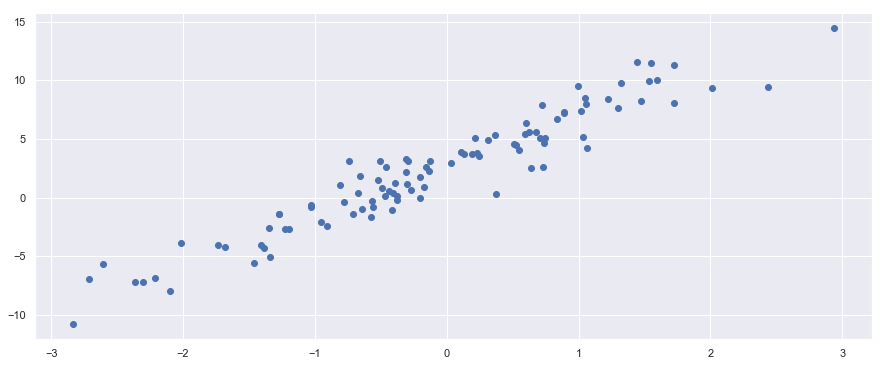

In [8]:
# посмотрим, что у нас за данные
plt.plot(x, y, 'o')
plt.show()

In [9]:
x

array([-1.73280076, -1.22619386,  1.72584972, -1.27200058, -1.34611792,
       -2.01653755, -2.6072884 ,  1.22638971,  0.52333127,  0.74747941,
        1.04571025,  0.5975843 , -0.64034115,  1.5910872 , -0.15908234,
       -0.56309944,  0.72868507,  0.50646288, -0.70912323,  1.03390878,
        0.37336607, -2.20985761, -0.49381727,  0.63877811,  0.12846599,
       -0.47086781, -0.46064582, -0.39063309,  0.23242541,  0.59472428,
       -2.30225997,  0.54517575,  0.6217631 , -2.83174602,  0.67820283,
       -0.41311093, -1.45854743, -1.1984943 , -1.33847385,  0.2149256 ,
       -0.20644644, -0.30958739, -0.50739795, -0.95295693,  0.74041722,
       -0.30285176,  0.03250854, -0.4113913 ,  0.36271658, -0.13514503,
        1.54795452, -0.17504095,  0.83350114, -1.38566928, -0.20331015,
        1.01726228,  0.24215796, -0.91008554, -0.12385247, -0.57714851,
       -0.38012985, -2.36581689,  0.99433191, -1.02898824,  0.72034987,
       -0.81298577,  2.01288368, -1.40637693, -0.29102742, -1.27

In [10]:
y

array([-4.02310274e+00, -2.66341407e+00,  8.11368411e+00, -1.39515602e+00,
       -2.60378232e+00, -3.88414244e+00, -5.68260975e+00,  8.39864838e+00,
        4.48219589e+00,  5.06984204e+00,  8.47690693e+00,  6.33200512e+00,
       -9.70225301e-01,  1.00110977e+01,  2.65912048e+00, -7.61248648e-01,
        2.63985853e+00,  4.54341332e+00, -1.34512558e+00,  5.19967421e+00,
        2.95678519e-01, -6.80206966e+00,  8.54989750e-01,  2.49338934e+00,
        3.72861412e+00,  1.41109480e-01,  2.65703321e+00,  1.27371691e+00,
        3.81125442e+00,  5.43358067e+00, -7.17164473e+00,  4.08038342e+00,
        5.62194506e+00, -1.08006886e+01,  5.57618975e+00, -1.05191871e+00,
       -5.55567454e+00, -2.64245174e+00, -5.05158287e+00,  5.05436429e+00,
        1.74403701e+00,  2.20512244e+00,  3.11951911e+00, -2.04037990e+00,
        4.70519100e+00,  1.18413969e+00,  2.98243409e+00,  3.66913464e-01,
        5.30731136e+00,  2.27205604e+00,  1.14454135e+01,  9.49278736e-01,
        6.67724051e+00, -

In [11]:
x0 = np.ones_like(x)
x0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
X = np.array([x, x0]).T

In [13]:
X.shape

(100, 2)

In [14]:
#func потерь

In [15]:
w = np.array([4, 3]).reshape(-1, 1)
w

array([[4],
       [3]])

In [16]:
y = y.reshape(-1, 1)

In [17]:
def f(X, w, y):
    Q = np.linalg.norm(X @ w - y) ** 2
    return Q

In [18]:
f(X, w, y)

217.04288060440496

In [19]:
#def Df(X, w, y):
    


In [20]:
#моё решение
def Df(X, w, y):
    return np.array([2 * ((X @ w - y).T @ X).sum() , 2 * ((X @ w - y)).sum()])


In [21]:
Df(X, w, y)

array([22.23372366, 60.45546636])

In [22]:
x.shape

(100,)

In [23]:
2 * ((X @ w - y).T @ X)

array([[-38.22174269,  60.45546636]])

In [28]:
X.shape

(100, 2)

In [71]:
def gradient_descent(Df, X, y, eta=0.000001, steps=20000, initial_point=(-3, 1), precision=1e-10):
    
    u_prev = np.array(initial_point)

    points = []
    for i in range(steps):
        points.append(u_prev)
        grad = Df(X, u_prev.reshape(-1, 1), y)
        
        u_new = u_prev - eta * grad

        if np.linalg.norm(u_new - u_prev) <= precision:
            points.append(u_new)
            break
        u_prev = u_new

    
    return points[-1]

In [72]:
gradient_descent(Df=Df, X=X, y=y)

array([3.93849323, 3.07260759])

### Задания для самостоятельного решения

Решите задачу по восстановлению параметров с помощью линейной регрессии. В качестве метода оптимизации используйте написанный выше градиентный спуск. Для этого:

1. Подготовьте выборку для решения задачи.
2. Реализуйте функцию потерь в векторном виде.
3. Реализуйте градиент функции потерь в векторном виде.
4. Примените метод градиентного спуска к полученным функциям и получите ответ. Сравните его с исходными параметрами.

In [ ]:
gradient_descent(f=f, Df=Df)

## Линейная регрессия на реальных данных

In [87]:
# http://archive.ics.uci.edu/ml/datasets/communities+and+crime

data = pd.read_csv('communities.csv')
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [88]:
X = data.drop(['ViolentCrimesPerPop'], axis=1)
y = data['ViolentCrimesPerPop']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [90]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
w = pd.DataFrame(data=np.array([X.columns, lr.coef_]).T, columns=['feature', 'weight'])
w[:10]

,feature,weight
0,population,0.252187
1,householdsize,-0.0310359
2,racepctblack,0.195446
3,racePctWhite,-0.0250307
4,racePctAsian,-0.0450098
5,racePctHisp,0.00298127
6,agePct12t21,0.017451
7,agePct12t29,-0.244082
8,agePct16t24,-0.0169306
9,agePct65up,0.0371688


In [59]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error
print('Train MSE:', mean_squared_error(y_train, train_pred))
print('Test MSE:', mean_squared_error(y_test, test_pred))

Train MSE: 0.016359323496169146
Test MSE: 2.490138802301267


В чем же дело?

In [61]:
w.sort_values(by='weight')[:5]

,feature,weight
103,PolicPerPop,-3498.28
96,LemasSwornFT,-0.995402
41,TotalPctDiv,-0.849737
98,LemasSwFTFieldOps,-0.661463
10,numbUrban,-0.450291


In [62]:
w.sort_values(by='weight', ascending=False)[:5]

,feature,weight
97,LemasSwFTPerPop,3498.8
64,PersPerOccupHous,0.715068
38,MalePctDivorce,0.581156
58,PctRecImmig8,0.462543
117,PolicOperBudg,0.401312


In [63]:
X_train['PolicPerPop'].corr(X_train['LemasSwFTPerPop'])

0.999999986013864

Как решить эту проблему?

### Drop

In [64]:
X_train_new = X_train.drop('LemasSwFTPerPop', axis=1)
X_test_new = X_test.drop('LemasSwFTPerPop', axis=1)
lr.fit(X_train_new, y_train)

train_pred = lr.predict(X_train_new)
test_pred = lr.predict(X_test_new)
print('Train MSE:', mean_squared_error(y_train, train_pred))
print('Test MSE:', mean_squared_error(y_test, test_pred))

Train MSE: 0.01649696295281812
Test MSE: 0.01766014399518391


In [65]:
w_new = pd.DataFrame(data=np.array([X_train_new.columns, lr.coef_]).T, columns=['feature', 'weight'])
w_new.sort_values(by='weight')[:5]

,feature,weight
96,LemasSwornFT,-1.06189
97,LemasSwFTFieldOps,-0.920515
41,TotalPctDiv,-0.869153
21,whitePerCap,-0.44629
67,PctPersOwnOccup,-0.433299


In [66]:
w_new.sort_values(by='weight', ascending=False)[:5]

,feature,weight
64,PersPerOccupHous,0.703808
102,PolicPerPop,0.680799
38,MalePctDivorce,0.585913
58,PctRecImmig8,0.456645
116,PolicOperBudg,0.419105


### L1-регуляризация

In [67]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.01)
las.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
train_pred = las.predict(X_train)
test_pred = las.predict(X_test)
print('Train MSE:', mean_squared_error(y_train, train_pred))
print('Test MSE:', mean_squared_error(y_test, test_pred))

Train MSE: 0.024894423845678748
Test MSE: 0.020387417071203236


In [69]:
w_las = pd.DataFrame(data = np.array([X.columns, las.coef_]).T, columns= ['feature', 'weight'])
w_las.sort_values(by='weight')[:5]

,feature,weight
44,PctKids2Par,-0.229753
3,racePctWhite,-0.148286
0,population,0
88,MedOwnCostPctIncNoMtg,-0
87,MedOwnCostPctInc,0


In [70]:
w_las.sort_values(by='weight', ascending=False)[:5]

,feature,weight
50,PctIlleg,0.262444
0,population,0
77,PctHousNoPhone,0
89,NumInShelters,0
88,MedOwnCostPctIncNoMtg,-0


### L2-регуляризация

In [71]:
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.01)
rid.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
train_pred = rid.predict(X_train)
test_pred = rid.predict(X_test)
print('Train MSE:', mean_squared_error(y_train, train_pred))
print('Test MSE:', mean_squared_error(y_test, test_pred))

Train MSE: 0.016503184756253262
Test MSE: 0.017598979988121866


In [73]:
w_rid = pd.DataFrame(data = np.array([X.columns, rid.coef_]).T, columns= ['feature', 'weight'])
w_rid.sort_values(by='weight')[:5]

,feature,weight
41,TotalPctDiv,-0.599396
96,LemasSwornFT,-0.582716
98,LemasSwFTFieldOps,-0.535143
21,whitePerCap,-0.437933
67,PctPersOwnOccup,-0.395254


In [74]:
w_rid.sort_values(by='weight', ascending=False)[:5]

,feature,weight
64,PersPerOccupHous,0.682676
38,MalePctDivorce,0.461897
58,PctRecImmig8,0.411863
85,MedRent,0.297405
19,medFamInc,0.296729
